# 1) Simple Linear Regression (SLR)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Load dataset of penguins
penguins = sns.load_dataset('penguins')
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.shape

(344, 7)

In [4]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

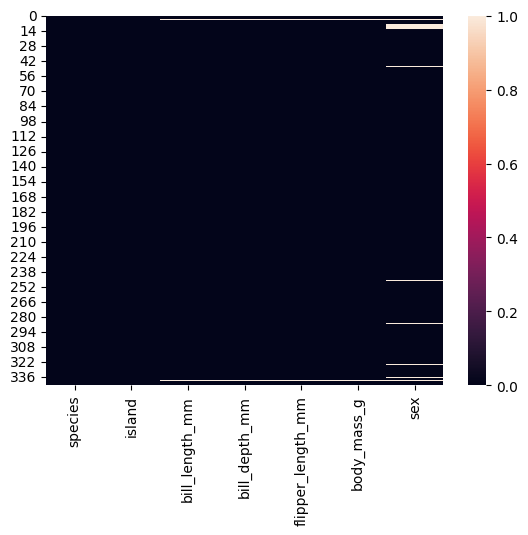

In [5]:
sns.heatmap(penguins.isnull(), cbar='blue');

In [6]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [8]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
# Penguins species : 'Adelie', 'Chinstrap':
penguins_sub = penguins[penguins['species'] != "Chinstrap"].dropna()
penguins_sub.reset_index(inplace = True, drop= True)
penguins_sub

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
260,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
261,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
262,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
263,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [2]:
# looking for linear relationships between the features :
sns.pairplot(penguins_sub)

NameError: name 'sns' is not defined

`bill_length_mm` and `body_mass_g` have a linear relatioship

## Build the model

In [11]:
#Build the model (X,Y):
ols_data = penguins_sub[['bill_length_mm', 'body_mass_g']]
ols_formula = "body_mass_g ~ bill_length_mm"

In [19]:
import statsmodels.formula.api as sm

In [22]:
#fit model to data :
OLS = sm.ols(formula= ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.33e-85
Time:                        16:39:16   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predictions

In [25]:
# Subset X variable :
X = ols_data['bill_length_mm']

#Get predictions from the model :
fitted_values = model.predict(X)

In [26]:
# Calculate Residuals :
residuals = model.resid

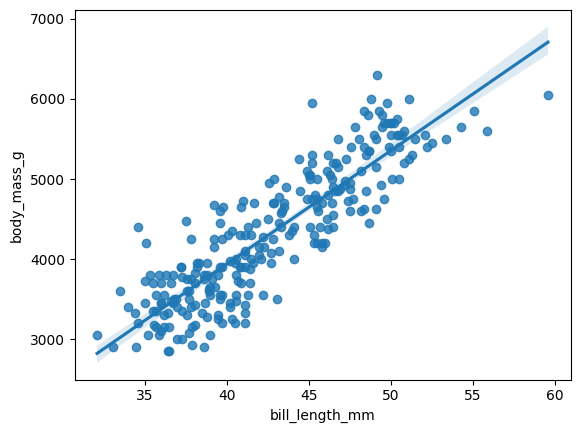

In [29]:
sns.regplot(data = ols_data, x= "bill_length_mm", y= "body_mass_g");

## Verification of the assumptions :

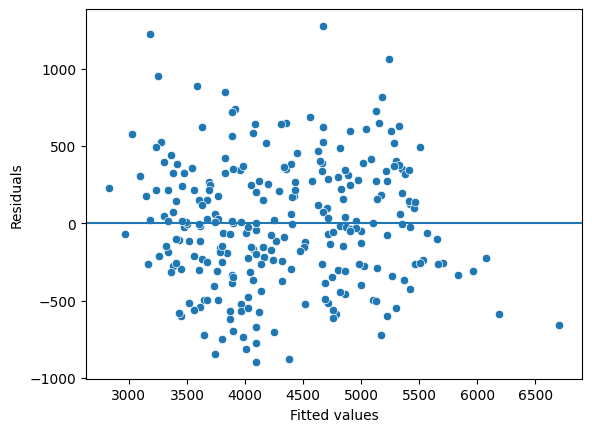

In [35]:
# Homoscedasticity assumption and Independence :
fig = sns.scatterplot(x = fitted_values, y = residuals)
fig.axhline(0)
fig.set_xlabel("Fitted values")
fig.set_ylabel("Residuals")
plt.show()

In [3]:
# Normality assumption :
fig = sns.histplot(residuals);
fig.set_xlabel('Residuals')
fig.set_ylabel('Count')
fig.set_title('Histogram of residuals');

NameError: name 'sns' is not defined

**Remark:** The residuals are a little bit scued in the histogram, so I'm going to create a q-q plot to verify normality.

In [44]:
import statsmodels.api as sm

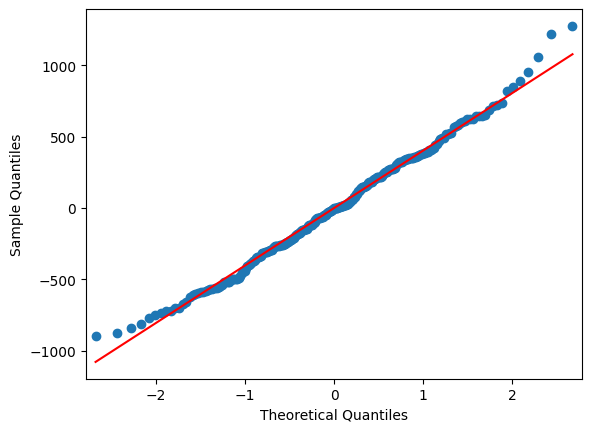

In [52]:
sm.qqplot(residuals, line ="s")  #s for straight line
plt.show()

# 2) Multiple Linear Regression (MLR)

In [83]:
penguins = sns.load_dataset("penguins")
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [84]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [88]:
penguins_subset = penguins[["bill_length_mm", "body_mass_g", "sex", "species"]]
penguins_subset = penguins_subset.rename(columns={ "sex" : "gender"})
penguins_subset.head()

,bill_length_mm,body_mass_g,gender,species
0,39.1,3750.0,Male,Adelie
1,39.5,3800.0,Female,Adelie
2,40.3,3250.0,Female,Adelie
3,NaN,NaN,NaN,Adelie
4,36.7,3450.0,Female,Adelie


In [89]:
penguins_subset = penguins_subset.dropna()

### Build the Model

In [90]:
# Independent Variables X1, X2, X3:
penguins_X = penguins_subset[['bill_length_mm', 'gender', 'species']]

# Dependent Variable Y:
penguins_Y = penguins_subset['body_mass_g']

In [91]:
# divide the prepared data into "training" and "holdout" (test) datasets, while holding 30% to test the model:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(penguins_X, penguins_Y,
                                                   test_size=0.3, random_state=42)

In [93]:
# The notation C(.) let's the stats OLS function know that 'gender' and 'species' are categorical variables : :
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"

#OlS dataset :
ols_data = pd.concat([X_train, Y_train], axis= 1)

import statsmodels.formula.api as sm

OLS = sm.ols(formula =ols_formula, data=ols_data)

In [94]:
# To fit the model to the data :
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.31e-92
Time:                        19:29:33   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(gender)[T.Male]         528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The Row : C(gender)[T.Male]:** 


The way the variable `gender` was encoded was **male is 1**, and **female is 0**, this means that the baseline or reference point is female penguins, so the coefficient indicates how much body mass would differ between 2 penguins that only differ in `gender` (cahier p. 107 **default**).

Assuming the penguins are the same species, and have the same building, we expect the male penguin's body mass to be about 528.95g more than the female penguin.

The **p-value** is very small, so this coefficient is **statistically significant**.

Now, let's consider the row for **bill_length_mm** :

Assuming that 2 penguins are the same gender, and species, if the bill length increases by *1mm*, we would expect the penguin with the longer built to be about **35.55g larger** in body mass.

The **p-value** is very small, so te estimate is **statistically significant**.

The OLS summary table also gives model evaluation metrics like **$R^2$** which is **0.85**, indicating that the model explains about **85% of the variance in body mass**, this seems reasonable.